<a href="https://colab.research.google.com/github/lmvu103/LSTM_Predict_vnStock/blob/main/LSTM_predict_vnstock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install batdata

In [2]:
import batdata
vnd = batdata.Vnd()

In [4]:
#Importing necessary libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# historical data of HPG from 2018-01-01 to 2018-12-31
data = vnd.hist("HPG","close","20180101","20181231")

jsonData = data.json # getting data as json
dfData = data.df # getting data as pandas DataFrame

# fromTime and toTime can also be python datetime objects
fromTime = datetime.datetime(2018,01,01)
toTime = datetime.datetime(2018,12,31)
hpgHist = vnd.hist("HPG","close",fromTime,toTime)

# historical OHLC data of HPG, MSN
hpgHistWeekly = vnd.hist(["HPG","MSN"],["open","high","low","close"],"20180101","20181231",interval="w")

# last price
hpgLast = vnd.curr("HPG","last")

In [ ]:
# historical OHLC data of HPG, MSN
hpgHistWeekly = vnd.hist(["HPG","MSN"],["open","high","low","close"],"20180101","20181231",interval="w")
jsonData = hpgHistWeekly.json # getting data as json
dfData = hpgHistWeekly.df # getting data as pandas DataFrame
dfData


In [ ]:
from datetime import datetime
import batdata
vnd = batdata.Vnd()
# fromTime and toTime can also be python datetime objects
fromTime = datetime(2018,1,1)
toTime = datetime(2021,6,29)
Hist = vnd.hist("HPG","close",fromTime,toTime)
Hist

[{'symbol': 'HPG', 'close': 52.1, 'tradingDate': '2021-06-29'}, {'symbol': 'HPG', 'close': 52.4, 'tradingDate': '2021-06-28'}, {'symbol': 'HPG', 'close': 50.7, 'tradingDate': '2021-06-25'}, {'symbol': 'HPG', 'close': 50.6, 'tradingDate': '2021-06-24'}, {'symbol': 'HPG', 'close': 51.4, 'tradingDate': '2021-06-23'}, {'symbol': 'HPG', 'close': 51.7, 'tradingDate': '2021-06-22'}, {'symbol': 'HPG', 'close': 51.2, 'tradingDate': '2021-06-21'}, {'symbol': 'HPG', 'close': 52.1, 'tradingDate': '2021-06-18'}, {'symbol': 'HPG', 'close': 51.4, 'tradingDate': '2021-06-17'}, {'symbol': 'HPG', 'close': 51.8, 'tradingDate': '2021-06-16'}, {'symbol': 'HPG', 'close': 53.2, 'tradingDate': '2021-06-15'}, {'symbol': 'HPG', 'close': 53.6, 'tradingDate': '2021-06-14'}, {'symbol': 'HPG', 'close': 53.1, 'tradingDate': '2021-06-11'}, {'symbol': 'HPG', 'close': 51.6, 'tradingDate': '2021-06-10'}, {'symbol': 'HPG', 'close': 50.3, 'tradingDate': '2021-06-09'}, {'symbol': 'HPG', 'close': 50.0, 'tradingDate': '2021-

In [5]:
# historical data of HPG from 2018-01-01 to 2018-12-31
data = vnd.hist("ROS","close","20180101","20210629")

jsonData = data.json # getting data as json
dfData = data.df # getting data as pandas DataFrame

dfData['tradingDate'] = pd.to_datetime(dfData['tradingDate'], format='%Y-%m-%d') #format date date
df=dfData.sort_values(by='tradingDate')
df.index=df['tradingDate']
df



,symbol,close,tradingDate
tradingDate,,,
2018-01-02,ROS,141.249,2018-01-02
2018-01-03,ROS,134.999,2018-01-03
2018-01-04,ROS,136.666,2018-01-04
2018-01-05,ROS,138.083,2018-01-05
2018-01-08,ROS,139.333,2018-01-08
...,...,...,...
2021-06-23,ROS,6.780,2021-06-23
2021-06-24,ROS,6.740,2021-06-24
2021-06-25,ROS,6.700,2021-06-25


In [6]:
data = df.filter(['close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.7)
training_data_len

609

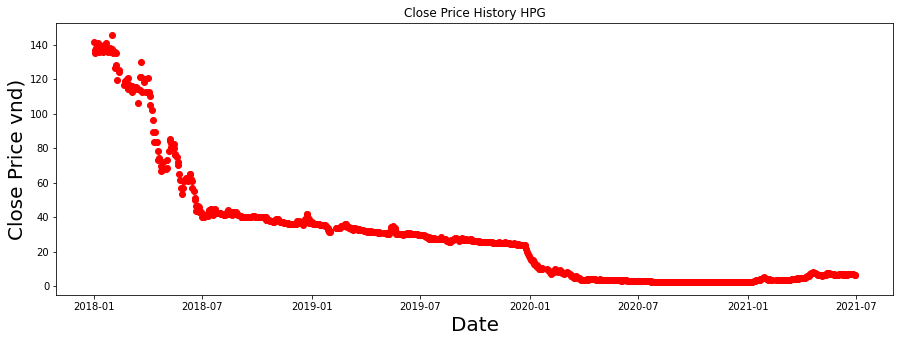

In [7]:
#Plotting the the graph
plt.figure(figsize=(15,5))
plt.title('Close Price History'+ ' HPG')
plt.scatter(df['tradingDate'],df['close'],c='Red')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price vnd)', fontsize=20)
plt.show()

In [8]:
#sale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[9.71489008e-01],
       [9.27856859e-01],
       [9.39494426e-01],
       [9.49386707e-01],
       [9.58113136e-01],
       [9.67419001e-01],
       [9.30767996e-01],
       [9.41239712e-01],
       [9.49966141e-01],
       [9.49966141e-01],
       [9.30767996e-01],
       [9.44150849e-01],
       [9.52877278e-01],
       [9.61603708e-01],
       [9.68584852e-01],
       [9.33679133e-01],
       [9.39494426e-01],
       [9.48220855e-01],
       [9.33679133e-01],
       [1.00000000e+00],
       [9.42984998e-01],
       [9.27856859e-01],
       [9.33092717e-01],
       [8.66771849e-01],
       [9.28443275e-01],
       [8.78409416e-01],
       [8.20235544e-01],
       [8.58045419e-01],
       [8.53395977e-01],
       [7.99871547e-01],
       [8.10922698e-01],
       [8.13254400e-01],
       [8.24884986e-01],
       [8.25471402e-01],
       [7.83584538e-01],
       [7.98705696e-01],
       [8.01037398e-01],
       [7.94056254e-01],
       [7.70781120e-01],
       [7.94056254e-01],


In [26]:
# split into train and test sets
train_size = int(len(scaled_data) * 0.70)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

In [27]:
# convert an array of values into a data_set matrix def
def create_data_set(_data_set, _look_back=1):
    data_x, data_y = [], []
    for i in range(len(_data_set) - _look_back - 1):
        a = _data_set[i:(i + _look_back), 0]
        data_x.append(a)
        data_y.append(_data_set[i + _look_back, 0])
    return np.array(data_x), np.array(data_y)

In [28]:
# reshape into X=t and Y=t+1
look_back =90
X_train,Y_train,X_test,Ytest = [],[],[],[]
X_train,Y_train=create_data_set(train,look_back)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test,Y_test=create_data_set(test,look_back)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [29]:
# create and fit the LSTM network regressor = Sequential() 
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))


regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
reduce_lr = ReduceLROnPlateau(monitor='val_loss',patience=5)
history =regressor.fit(X_train, Y_train, epochs = 100, batch_size = 32,validation_data=(X_test, Y_test), callbacks=[reduce_lr],shuffle=False)

Epoch 1/100
17/17 [==============================] - 8s 202ms/step - loss: 0.0669 - val_loss: 0.0058
Epoch 2/100
17/17 [==============================] - 2s 128ms/step - loss: 0.0096 - val_loss: 0.0038
Epoch 3/100
17/17 [==============================] - 2s 129ms/step - loss: 0.0018 - val_loss: 3.4829e-04
Epoch 4/100
17/17 [==============================] - 2s 125ms/step - loss: 0.0031 - val_loss: 3.3841e-05
Epoch 5/100
17/17 [==============================] - 2s 129ms/step - loss: 0.0030 - val_loss: 1.2814e-04
Epoch 6/100
17/17 [==============================] - 2s 127ms/step - loss: 0.0015 - val_loss: 3.3430e-04
Epoch 7/100
17/17 [==============================] - 2s 130ms/step - loss: 0.0021 - val_loss: 1.2852e-04
Epoch 8/100
17/17 [==============================] - 2s 128ms/step - loss: 0.0014 - val_loss: 3.8774e-04
Epoch 9/100
17/17 [==============================] - 2s 129ms/step - loss: 0.0013 - val_loss: 2.1800e-04
Epoch 10/100
17/17 [==============================] - 2s 127ms/

In [30]:
train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)

# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

Train Mean Absolute Error: 1.571732705926065
Train Root Mean Squared Error: 2.5334142237566355
Test Mean Absolute Error: 1.151073927570792
Test Root Mean Squared Error: 1.3551190708633092


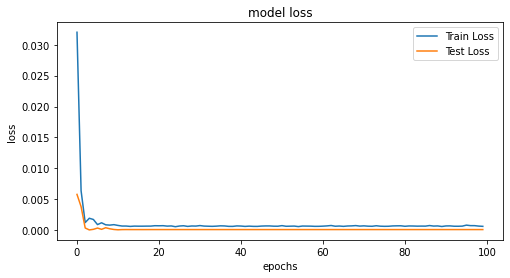

In [31]:
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [32]:
#creatinf testing dataset
test_data = scaled_data[training_data_len - 60: , :]

#creating x_test and y_tets datasets
x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i -60:i, 0])

#converting data to numpy array
x_test = np.array(x_test)

#reshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#get predicted price values
predictions = regressor.predict(x_test)
predictions = scaler.inverse_transform(predictions)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


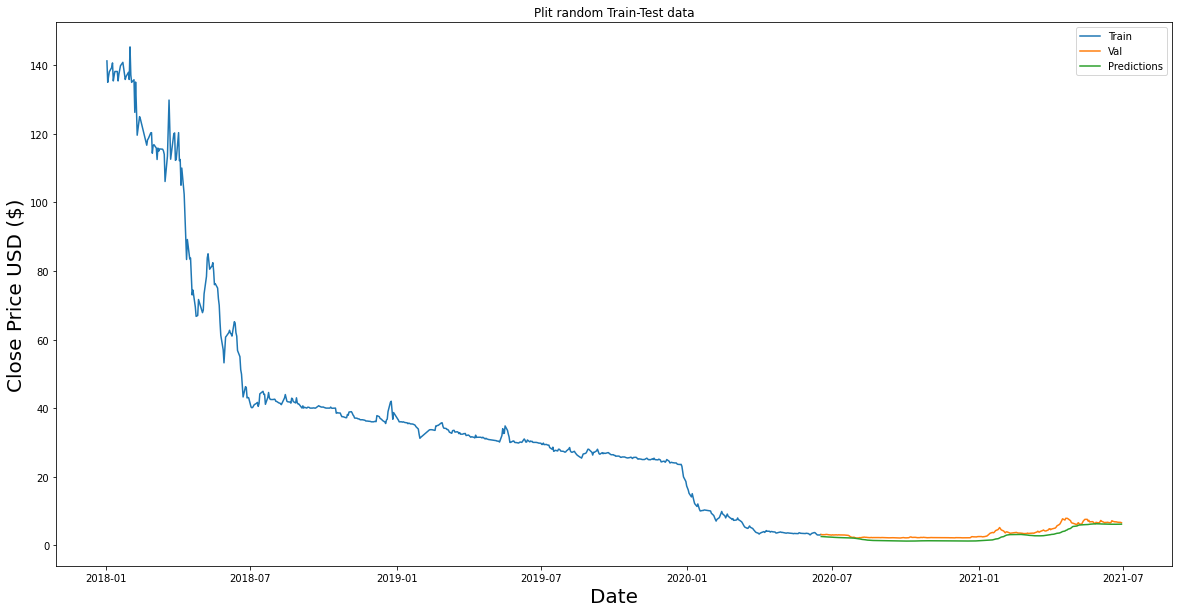

In [34]:
#plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualization
plt.figure(figsize=(20,10))
plt.title('Plit random Train-Test data')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val','Predictions'], loc='upper right')
plt.show()

In [35]:
valid

,close,Predictions
tradingDate,,
2020-06-17,3.15,2.547517
2020-06-18,3.08,2.531084
2020-06-19,3.09,2.512210
2020-06-22,3.09,2.491501
2020-06-23,3.17,2.469602
...,...,...
2021-06-23,6.78,6.128767
2021-06-24,6.74,6.134900
2021-06-25,6.70,6.141334


In [45]:
dataset_test = data[-60:].values

inputs = dataset_test
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

i = 0
while i < 30:
    X_test = []
    no_of_sample = len(inputs)

    # Lay du lieu cuoi cung
    X_test.append(inputs[no_of_sample-30:no_of_sample, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Du doan gia
    predicted_stock_price = regressor.predict(X_test)

    # chuyen gia tu khoang (0,1) thanh gia that
    predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

    dataset_test = np.append(dataset_test, predicted_stock_price[0])
    inputs = dataset_test
    inputs = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)
    print('Price next (' + str(i+1) + ') days : ', predicted_stock_price[0][0])
    i = i + 1

Price next (1) days :  6.4116254
Price next (2) days :  6.4082484
Price next (3) days :  6.401792
Price next (4) days :  6.3903737
Price next (5) days :  6.3745275
Price next (6) days :  6.3558893
Price next (7) days :  6.3347025
Price next (8) days :  6.3114614
Price next (9) days :  6.284731
Price next (10) days :  6.2572303
Price next (11) days :  6.228715
Price next (12) days :  6.198622
Price next (13) days :  6.166892
Price next (14) days :  6.1360645
Price next (15) days :  6.106181
Price next (16) days :  6.0767074
Price next (17) days :  6.0464234
Price next (18) days :  6.016175
Price next (19) days :  5.985488
Price next (20) days :  5.955153
Price next (21) days :  5.9247866
Price next (22) days :  5.8936844
Price next (23) days :  5.86102
Price next (24) days :  5.82913
Price next (25) days :  5.7979217
Price next (26) days :  5.766362
Price next (27) days :  5.7349415
Price next (28) days :  5.7034645
Price next (29) days :  5.671907
Price next (30) days :  5.6402225


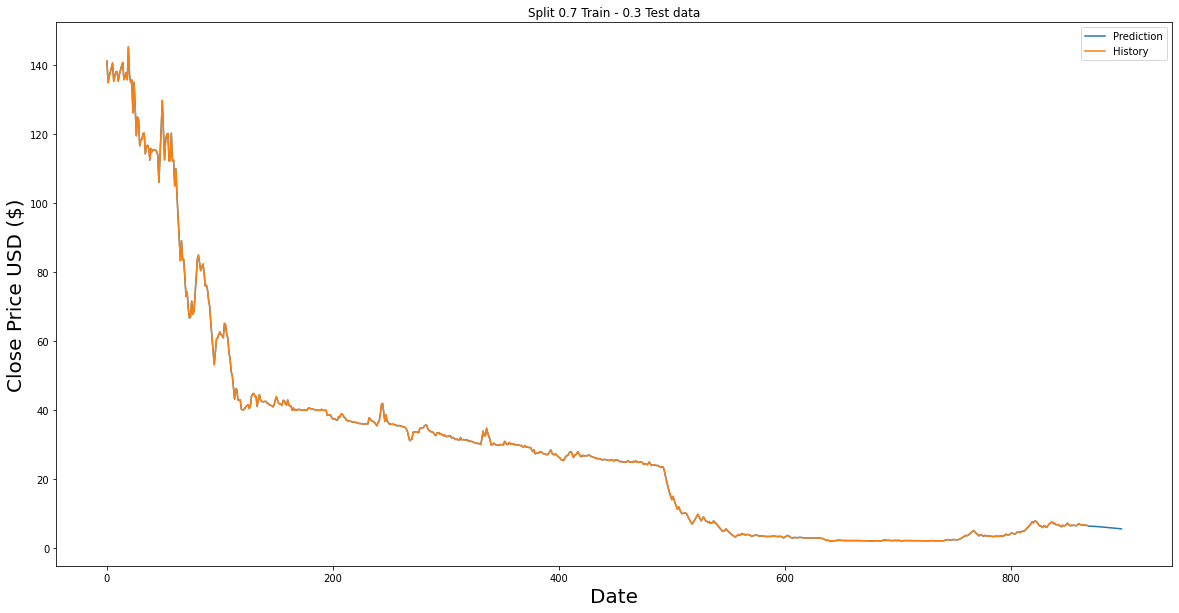

In [44]:
dataset_pre = np.append(data['close'], dataset_test[60:])

#visualization
plt.figure(figsize=(20,10))
plt.title('Split 0.7 Train - 0.3 Test data')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.plot(dataset_pre)
plt.plot(dataset[:])
plt.legend(['Prediction', 'History'], loc='upper right')
plt.show()